# Credit Card Fraud Detection

This project aims to detect fraudulent transactions in a dataset using machine learning models like Logistic Regression and Decision Tree. The dataset is highly imbalanced, and techniques like SMOTE are used to balance it.


# Import necessary libraries

In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE

# Load and Explore the Dataset

In [2]:
# Load the dataset
dataset = pd.read_csv('creditcard.csv')

In [3]:
# Display first few rows of dataset
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# dataset Information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
# Check for missing values
dataset.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# Exploratory Data Analysis (EDA)

In [6]:
# fraudulent and legitimate transactions
fraudulent_transactions = dataset[dataset['Class'] == 1]  
legitimate_transactions = dataset[dataset['Class'] == 0] 

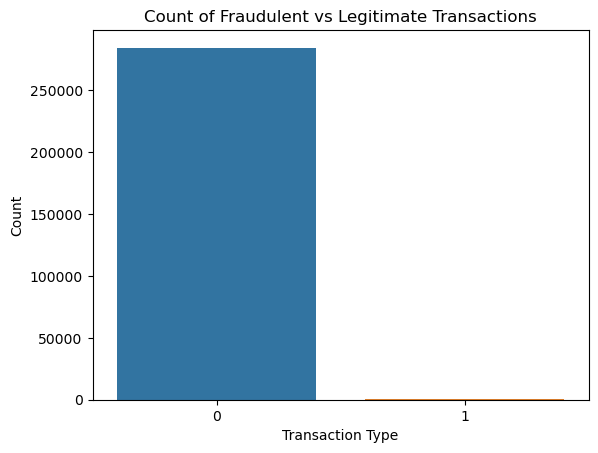

In [7]:
# Visualize class distribution
sns.countplot(x='Class', data=dataset)
plt.title('Count of Fraudulent vs Legitimate Transactions')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

In [8]:
fraudulent_transactions.shape

(492, 31)

In [9]:
legitimate_transactions.shape

(284315, 31)

In [10]:
# Features and target
X = dataset.drop('Class', axis=1) 
y = dataset['Class']  

In [11]:
# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [12]:
# Split the resampled data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [13]:
# Standardize the data 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
#  Logistic Regression 
log_reg = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Make prediction
y_pred_logreg = log_reg.predict(X_test)


In [15]:
# report for Logistic Regression
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_logreg))

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     56750
           1       0.99      0.97      0.98     56976

    accuracy                           0.98    113726
   macro avg       0.98      0.98      0.98    113726
weighted avg       0.98      0.98      0.98    113726



In [16]:
# Confusion Matrix
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
print(f"Confusion Matrix:\n{cm_logreg}")

Confusion Matrix:
[[56232   518]
 [ 1718 55258]]


In [17]:
# Calculate and print ROC-AUC
roc_auc_logreg = roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1])
print(f"ROC-AUC Logistic Regression: {roc_auc_logreg}")

ROC-AUC Logistic Regression: 0.9974528305913177


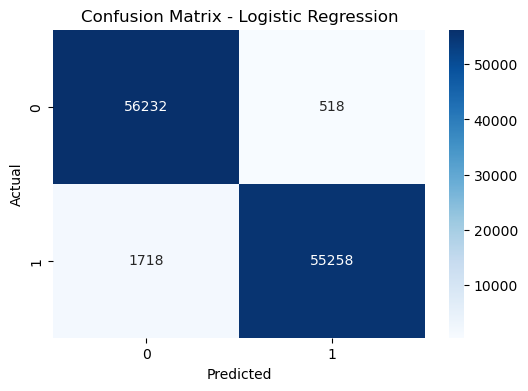

In [18]:
# Plot Confusion Matrix for Logistic Regression
plt.figure(figsize=(6, 4))
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [19]:
# Train Decision Tree
tree_clf = DecisionTreeClassifier(class_weight='balanced', random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [20]:
# Make predictions
y_pred_tree = tree_clf.predict(X_test)

# Print classification report
print("Classification Report for Decision Tree:")
print(classification_report(y_test, y_pred_tree))

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



In [24]:
# Confusion Matrix for Decision Tree
cm_tree = confusion_matrix(y_test, y_pred_tree)
print(f"Confusion Matrix:\n{cm_tree}")

Confusion Matrix:
[[56620   130]
 [   31 56945]]


In [25]:
# ROC-AUC for Decision Tree
roc_auc_tree = roc_auc_score(y_test, tree_clf.predict_proba(X_test)[:, 1])
print(f"ROC-AUC Decision Tree: {roc_auc_tree}")


ROC-AUC Decision Tree: 0.9985825811811017


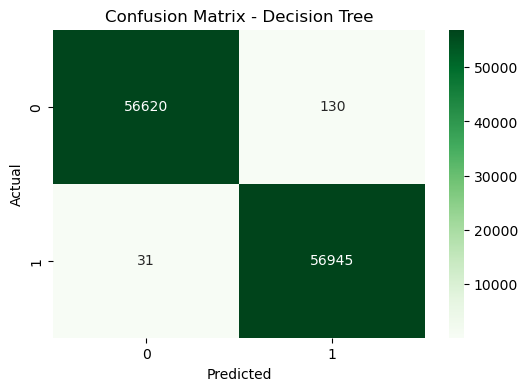

In [26]:
# Plot Confusion Matrix for Decision Tree
plt.figure(figsize=(6, 4))
sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Decision Tree')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

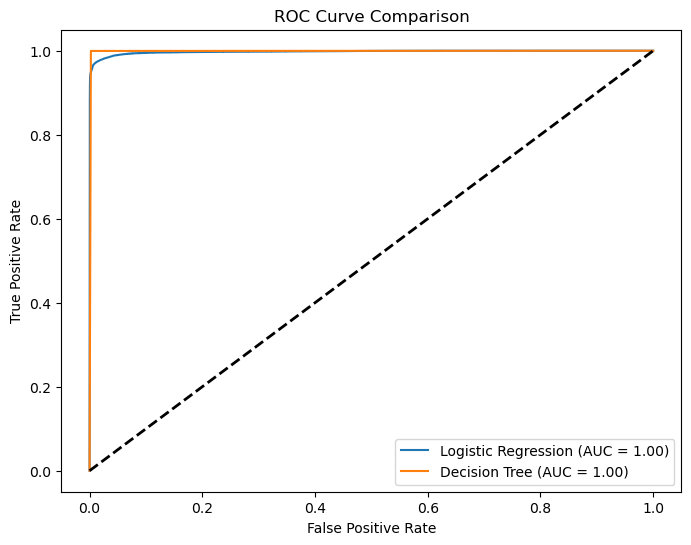

In [27]:
# Compare ROC Curves for both models
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, log_reg.predict_proba(X_test)[:, 1])
fpr_tree, tpr_tree, _ = roc_curve(y_test, tree_clf.predict_proba(X_test)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {roc_auc_logreg:.2f})')
plt.plot(fpr_tree, tpr_tree, label=f'Decision Tree (AUC = {roc_auc_tree:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()
